# Week 06. 데이터 분석 및 시각화 / 자동화 및 배포

## 1. 데이터 분석

In [1]:
n_total_test = 400
TP, FP, FN, TN = 120, 70, 40, 170
assert n_total_test == (TP + FP + FN + TN), "different count between {} and {}".format(n_total_test, TP+FP+FN+TN)

In [2]:
# accuracy
accuracy = (TP + TN) / n_total_test
print("accuracy", accuracy)

accuracy 0.725


In [3]:
# F1-Score
# -precision
precision = TP / (TP + FP)
print("precision", precision)

# -recall
recall = TP / (TP + FN)
print("recall", recall)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)
print("f1_score", f1_score)

precision 0.631578947368421
recall 0.75
f1_score 0.6857142857142857


## 2. 데이터 시각화

### 2-1. matplitlib ([example](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/))

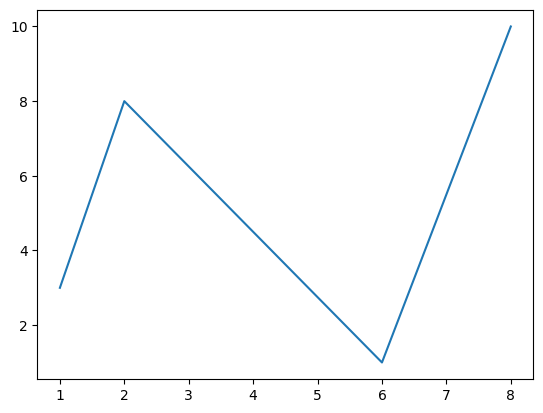

In [4]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([1, 2, 6, 8])
ypoints = np.array([3, 8, 1, 10])

plt.plot(xpoints, ypoints)
plt.show()

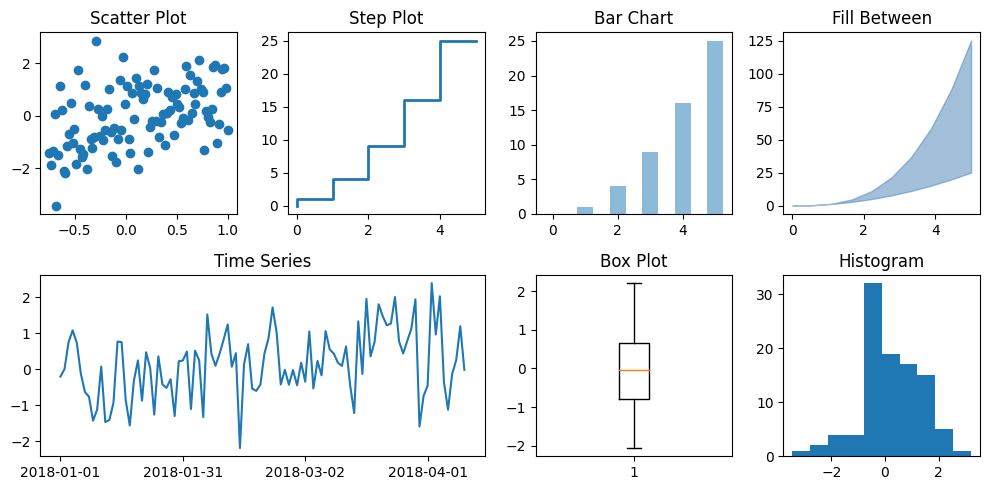

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setup the subplot2grid Layout
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((2,4), (0,0)) 
ax2 = plt.subplot2grid((2,4), (0,1)) 
ax3 = plt.subplot2grid((2,4), (0,2)) 
ax4 = plt.subplot2grid((2,4), (0,3)) 
ax5 = plt.subplot2grid((2,4), (1,0), colspan=2) 
ax6 = plt.subplot2grid((2,4), (1,2)) 
ax7 = plt.subplot2grid((2,4), (1,3)) 

# Input Arrays
n = np.array([0,1,2,3,4,5])
x = np.linspace(0,5,10)
xx = np.linspace(-0.75, 1., 100)

# Scatterplot
ax1.scatter(xx, xx + np.random.randn(len(xx)))
ax1.set_title("Scatter Plot")

# Step Chart
ax2.step(n, n**2, lw=2)
ax2.set_title("Step Plot")

# Bar Chart
ax3.bar(n, n**2, align="center", width=0.5, alpha=0.5)
ax3.set_title("Bar Chart")

# Fill Between
ax4.fill_between(x, x**2, x**3, color="steelblue", alpha=0.5);
ax4.set_title("Fill Between");

# Time Series
dates = pd.date_range('2018-01-01', periods = len(xx))
ax5.plot(dates, xx + np.random.randn(len(xx)))
ax5.set_xticks(dates[::30])
ax5.set_xticklabels(dates.strftime('%Y-%m-%d')[::30])
ax5.set_title("Time Series")

# Box Plot
ax6.boxplot(np.random.randn(len(xx)))
ax6.set_title("Box Plot")

# Histogram
ax7.hist(xx + np.random.randn(len(xx)))
ax7.set_title("Histogram")

fig.tight_layout()

### 2-2. seaborn

In [6]:
!pip3 install seaborn

<AxesSubplot: xlabel='timepoint', ylabel='signal'>

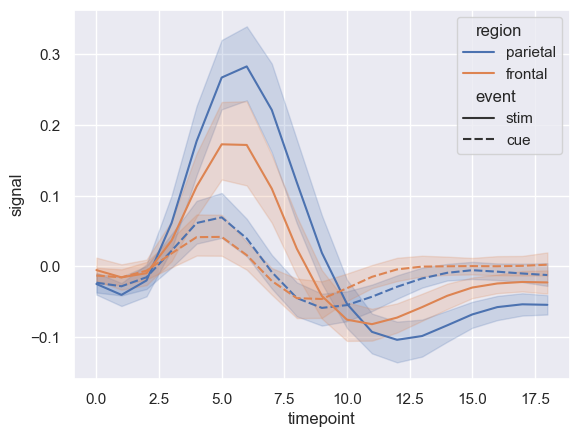

In [7]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [8]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [9]:
print(type(fmri))

<class 'pandas.core.frame.DataFrame'>


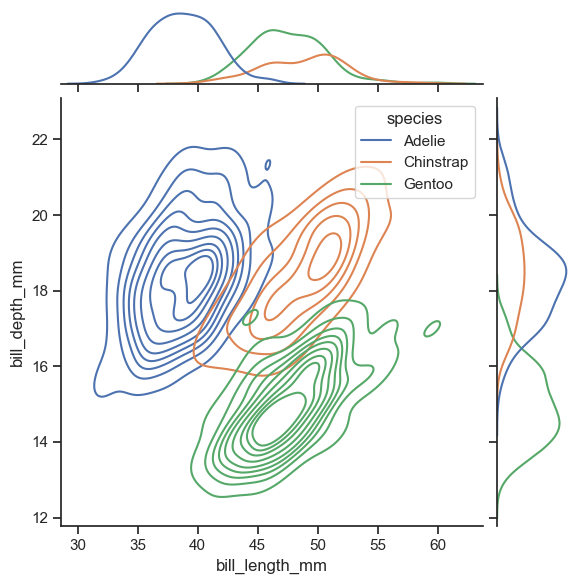

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)

In [11]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [12]:
print(type(penguins))

<class 'pandas.core.frame.DataFrame'>


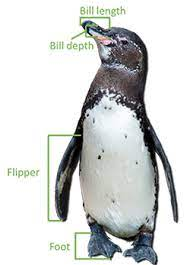

## 3. 데이터 프로그래밍 자동화 시스템 만들기 

### 3-1. 데이터 수집 및 전처리 (ex. crawling) - week 02 / 03 / 04

In [13]:
# data crawling (https://finance.yahoo.com/most-active)

import requests

url = 'https://finance.yahoo.com/most-active'
result = requests.get(url)
result

<Response [404]>

In [14]:
# https://stackoverflow.com/questions/47506092/python-requests-get-always-get-404
import requests

url = 'https://finance.yahoo.com/most-active'
result = requests.get(url, headers={'User-Agent': 'Custom'})
result

<Response [200]>

In [15]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(result.text, 'html.parser')

data = soup.find_all("tbody")
data

[<tbody><tr class="simpTblRow Bgc($hoverBgColor):h BdB Bdbc($seperatorColor) Bdbc($tableBorderBlue):h H(32px) Bgc($lv2BgColor)"><td aria-label="Symbol" class="Va(m) Ta(start) Pstart(6px) Pend(10px) Miw(90px) Start(0) Pend(10px) simpTblRow:h_Bgc($hoverBgColor) Pos(st) Bgc($lv3BgColor) Z(1) Bgc($lv2BgColor) Ta(start)! Fz(s)" colspan=""><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-id="portfolio-checkbox"><input aria-label="Select TSLA" class="Pos(a) Op(0) checkbox" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) checkbox:f+Stk($linkColor)! checkbox:f+Fill($linkColor)! Stk($plusGray) Fill($plusGray) Cur(p)" data-icon="checkbox-unchecked" height="16" style="stroke-width:0;vertical-align:bottom" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z"></path></svg></label><a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/TSLA?p=TSLA" title="Tesla, Inc.">TSLA</a><div 

In [16]:
rows = data[0].find_all("tr")
rows

[<tr class="simpTblRow Bgc($hoverBgColor):h BdB Bdbc($seperatorColor) Bdbc($tableBorderBlue):h H(32px) Bgc($lv2BgColor)"><td aria-label="Symbol" class="Va(m) Ta(start) Pstart(6px) Pend(10px) Miw(90px) Start(0) Pend(10px) simpTblRow:h_Bgc($hoverBgColor) Pos(st) Bgc($lv3BgColor) Z(1) Bgc($lv2BgColor) Ta(start)! Fz(s)" colspan=""><label class="Ta(c) Pos(r) Va(tb) Pend(5px) D(n)--print" data-id="portfolio-checkbox"><input aria-label="Select TSLA" class="Pos(a) Op(0) checkbox" type="checkbox"/><svg class="Va(m)! H(16px) W(16px) checkbox:f+Stk($linkColor)! checkbox:f+Fill($linkColor)! Stk($plusGray) Fill($plusGray) Cur(p)" data-icon="checkbox-unchecked" height="16" style="stroke-width:0;vertical-align:bottom" viewbox="0 0 24 24" width="16"><path d="M3 3h18v18H3V3zm19-2H2c-.553 0-1 .448-1 1v20c0 .552.447 1 1 1h20c.552 0 1-.448 1-1V2c0-.552-.448-1-1-1z"></path></svg></label><a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/TSLA?p=TSLA" title="Tesla, Inc.">TSLA</a><div class="

In [17]:
for row in rows:
    columns = row.find_all('td')
    for idx, col in enumerate(columns):
        print(idx, col.text)

0 TSLA
1 Tesla, Inc.
2 122.74
3 -0.48
4 -0.39%
5 124.893M
6 116.712M
7 387.583B
8 39.09
9 
0 AAL
1 American Airlines Group Inc.
2 16.68
3 +1.34
4 +8.74%
5 65.346M
6 28.02M
7 10.84B
8 N/A
9 
0 AMZN
1 Amazon.com, Inc.
2 95.50
3 +0.41
4 +0.43%
5 61.331M
6 83.433M
7 974.284B
8 85.27
9 
0 AMD
1 Advanced Micro Devices, Inc.
2 71.42
3 +2.36
4 +3.42%
5 53.259M
6 69.884M
7 115.155B
8 45.49
9 
0 AAPL
1 Apple Inc.
2 133.82
3 +0.33
4 +0.25%
5 49.356M
6 83.617M
7 2.129T
8 21.90
9 
0 BBD
1 Banco Bradesco S.A.
2 2.9550
3 -0.0050
4 -0.17%
5 42.104M
6 44.251M
7 31.496B
8 6.57
9 
0 NVDA
1 NVIDIA Corporation
2 166.03
3 +6.02
4 +3.76%
5 40.217M
6 48.628M
7 413.747B
8 44.52
9 
0 F
1 Ford Motor Company
2 13.50
3 +0.28
4 +2.12%
5 35.489M
6 53.666M
7 54.277B
8 6.03
9 
0 SOFI
1 SoFi Technologies, Inc.
2 5.28
3 +0.13
4 +2.52%
5 35.215M
6 43.096M
7 4.222B
8 N/A
9 
0 LCID
1 Lucid Group, Inc.
2 8.32
3 +0.39
4 +4.98%
5 33.503M
6 25.667M
7 15.221B
8 8.08
9 
0 CCL
1 Carnival Corporation & plc
2 10.18
3 +0.32
4 +3.19%

In [18]:
column_names = ['symbol', 'name', 'price', 'change', '%change', 'volume', 'avg_vol_3_months', 'market_cap', 'PE_ratio']
results = []
for row in rows:
    columns = row.find_all('td')
    temp_symbol = {}
    for idx, col in enumerate(columns):
        if idx != 9:
            temp_symbol[column_names[idx]] = col.text
    results.append(temp_symbol)

print(results)

[{'symbol': 'TSLA', 'name': 'Tesla, Inc.', 'price': '122.74', 'change': '-0.48', '%change': '-0.39%', 'volume': '124.893M', 'avg_vol_3_months': '116.712M', 'market_cap': '387.583B', 'PE_ratio': '39.09'}, {'symbol': 'AAL', 'name': 'American Airlines Group Inc.', 'price': '16.68', 'change': '+1.34', '%change': '+8.74%', 'volume': '65.346M', 'avg_vol_3_months': '28.02M', 'market_cap': '10.84B', 'PE_ratio': 'N/A'}, {'symbol': 'AMZN', 'name': 'Amazon.com, Inc.', 'price': '95.50', 'change': '+0.41', '%change': '+0.43%', 'volume': '61.331M', 'avg_vol_3_months': '83.433M', 'market_cap': '974.284B', 'PE_ratio': '85.27'}, {'symbol': 'AMD', 'name': 'Advanced Micro Devices, Inc.', 'price': '71.42', 'change': '+2.36', '%change': '+3.42%', 'volume': '53.259M', 'avg_vol_3_months': '69.884M', 'market_cap': '115.155B', 'PE_ratio': '45.49'}, {'symbol': 'AAPL', 'name': 'Apple Inc.', 'price': '133.82', 'change': '+0.33', '%change': '+0.25%', 'volume': '49.356M', 'avg_vol_3_months': '83.617M', 'market_cap'

### 3-2. 데이터 활용로직 (ex. max change) - week 05

In [19]:
def get_percs(results):
    percs = {}
    for result in results:
        name = result['name']
        
        perc_change = result['%change'][:-1]
        percs[name] = float(perc_change[1:]) if perc_change[0] == '+' else -float(perc_change[1:])
        
    return percs

percs = get_percs(results)
print(percs)

{'Tesla, Inc.': -0.39, 'American Airlines Group Inc.': 8.74, 'Amazon.com, Inc.': 0.43, 'Advanced Micro Devices, Inc.': 3.42, 'Apple Inc.': 0.25, 'Banco Bradesco S.A.': -0.17, 'NVIDIA Corporation': 3.76, 'Ford Motor Company': 2.12, 'SoFi Technologies, Inc.': 2.52, 'Lucid Group, Inc.': 4.98, 'Carnival Corporation & plc': 3.19, 'AMC Entertainment Holdings, Inc.': 9.92, 'NIO Inc.': 1.28, 'Itaú Unibanco Holding S.A.': 0.79, 'Taiwan Semiconductor Manufacturing Company Limited': 7.78, 'Ambev S.A.': 1.65, 'Transocean Ltd.': 0.74, 'Bank of America Corporation': 0.84, 'Palantir Technologies Inc.': 0.4, 'Telefonaktiebolaget LM Ericsson (publ)': 5.83, 'Rivian Automotive, Inc.': 2.75, 'Meta Platforms, Inc.': 3.03, 'Nu Holdings Ltd.': -0.81, 'Alphabet Inc.': -0.02}


In [20]:
def max_perc_change(percs):
    max_name = max(percs, key=percs.get)
    max_perc = percs[max_name]
    
    return max_name, max_perc

max_change = max_perc_change(percs)
print(max_change)

('AMC Entertainment Holdings, Inc.', 9.92)


### 3-3. 데이터 시각화 (ex. matplotlib) - week 06

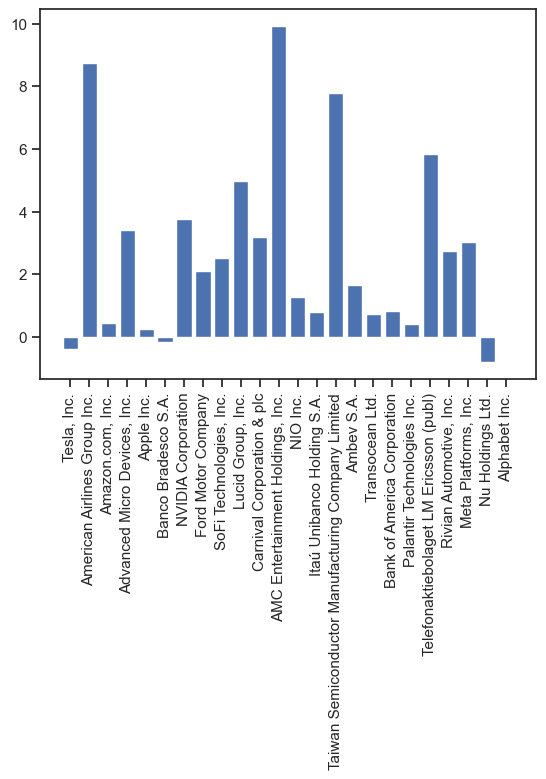

In [21]:
import matplotlib.pyplot as plt

plt.bar(range(len(percs)), list(percs.values()), align='center')
plt.xticks(range(len(percs)), list(percs.keys()))
plt.xticks(rotation=90)
plt.show()

### 3-4. 데이터 리포트 (ex. [telegram](https://wikidocs.net/92180)) - extra

### 3-5. 자동화 (ex. [crontab](https://jdm.kr/blog/2)) - extra

In [22]:
# manual method

import time

def my_program():
    cnt = 0
    while cnt < 10:
        print(cnt)
        cnt += 1
        time.sleep(1)

my_program()

0
1
2
3
4
5
6
7
8
9


## 4. 데이터 프로그래밍 자동화 시스템 배포하기 

In [23]:
!pip3 install flask

In [ ]:
from flask import Flask
import requests
from bs4 import BeautifulSoup

app = Flask(__name__)

@app.route("/")
def hello_world():
    return "<p>Hello, World!</p>"

@app.route('/maxperc')
def max_perc():
    url = 'https://finance.yahoo.com/most-active'
    result = requests.get(url, headers={'User-Agent': 'Custom'})

    soup = BeautifulSoup(result.text, 'html.parser')
    data = soup.find_all("tbody")
    rows = data[0].find_all("tr")

    column_names = ['symbol', 'name', 'price', 'change', '%change', 'volume', 'avg_vol_3_months', 'market_cap', 'PE_ratio']
    results = []
    for row in rows:
        columns = row.find_all('td')
        temp_symbol = {}
        for idx, col in enumerate(columns):
            if idx != 9:
                temp_symbol[column_names[idx]] = col.text
        results.append(temp_symbol)

    percs = get_percs(results)
    max_change = max_perc_change(percs)

    res = {'changes': percs, 'max_change': max_change}

    return res

def get_percs(results):
    percs = {}
    for result in results:
        name = result['name']

        perc_change = result['%change'][:-1]
        percs[name] = float(perc_change[1:]) if perc_change[0] == '+' else -float(perc_change[1:])

    return percs
    
def max_perc_change(percs):
    max_name = max(percs, key=percs.get)
    max_perc = percs[max_name]

    return max_name, max_perc

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)